# Figure Five: Alpha & Proton Composition

- Panel (a): Alpha-to-Proton Abundance Ratio ($\rm N_{\alpha}/N_p$)
- Panel (b): Normalized Alpha-to Proton Differential Velocity ($\rm \frac{|v_{\alpha} - v_p|}{v_A}$)
- Panel (c): Scaled Proton to Alpha Abundance ($\rm N_{\alpha}R^2 \; v. \; N_p R^2$)

## Imports

In [1]:
import os

import datetime

import numpy as np
import pandas as pd
from scipy import stats
import scipy.stats as stats

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

# COLORS
c = ['#ae017e','#085A99',  '#c98000'] # darker colors
lightc = ['#FCA4C4',  '#8FD3F4', '#FFCC70'] # lighter colors
fcol = 'mistyrose'
sacol='lavender'
sacol = 'violet'
scol = 'lightgreen'
hcol = 'lightblue'
aa = 0.6
lw=2
clon = '#ae017e'
clat = '#085A99'
rcol = 'dimgrey'
cmaps = ['RdPu', 'cool', 'Wistia', 'spring']

# REGIONS
loc_hcs = [113, 116]
ssw = [166, 175]
sasw = [175, 185]
fsw = [70, 85]

# DIRECTORIES
IMG_DIR = './figures'
DF_DIR = './results'
PlotDir = '/Users/tamarervin/mplstyle/'

# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 18})
plt.style.use(plot_style)

## Data

In [2]:
# regular data
parker = pd.read_csv(os.path.realpath('results/parker.csv'))
orbiter = pd.read_csv(os.path.realpath('results/orbiter.csv'))
abun = pd.read_csv(os.path.realpath('results/abun.csv'))
smag = pd.read_csv(os.path.realpath('results/solo_mag.csv'))
merged_df = pd.read_csv(os.path.realpath('results/merged_df.csv'))
pss = pd.read_csv(os.path.realpath('results/pss.csv'))
oss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/oss.csv')

# timesampled data
parkerdownt = pd.read_csv(os.path.realpath('results/parkerdownt.csv'))
orbiterdownt = pd.read_csv(os.path.realpath('results/orbiterdownt.csv'))
abundownt = pd.read_csv(os.path.realpath('results/abundownt.csv'))
smagdownt = pd.read_csv(os.path.realpath('results/smagdownt.csv'))

# longitudinally sampled data
parkerdownl = pd.read_csv(os.path.realpath('results/parkerdownl.csv'))
orbiterdownl = pd.read_csv(os.path.realpath('results/orbiterdownl.csv'))
abundownl = pd.read_csv(os.path.realpath('results/abundownl.csv'))
smagdownl = pd.read_csv(os.path.realpath('results/smagdownl.csv'))

# PFSS/MHD data
tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/mhd_footpoints.dat', sep='\s+') 
so_tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/so_mhd_footpoints.dat', sep='\s+')
pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/psp_pfss.csv')
so_pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/so_pfss.csv')

# FIX TIMESTAMPS
parker['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parker.Time]
orbiter['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in orbiter.Time]
pss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in pss.Time]
oss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in oss.Time]
smag['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in smag.Time]
abun['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in abun.Time]
so_pfss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in so_pfss.times]
parkerdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parkerdownt.Time]
orbiterdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in orbiterdownt.Time]
smagdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in smagdownt.Time]
abundownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in abundownt.Time]

## Figure Five: Density and Velocity Figure

In [3]:
### REGION IDENTIFICATION
lon_footpoints = parker.lon
fast = np.logical_and(lon_footpoints >= fsw[0], lon_footpoints <=fsw[1])
salf = np.logical_and(lon_footpoints >= sasw[0], lon_footpoints <=sasw[1])
hhcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
slow = np.logical_and(lon_footpoints >=ssw[0], lon_footpoints <=ssw[1])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


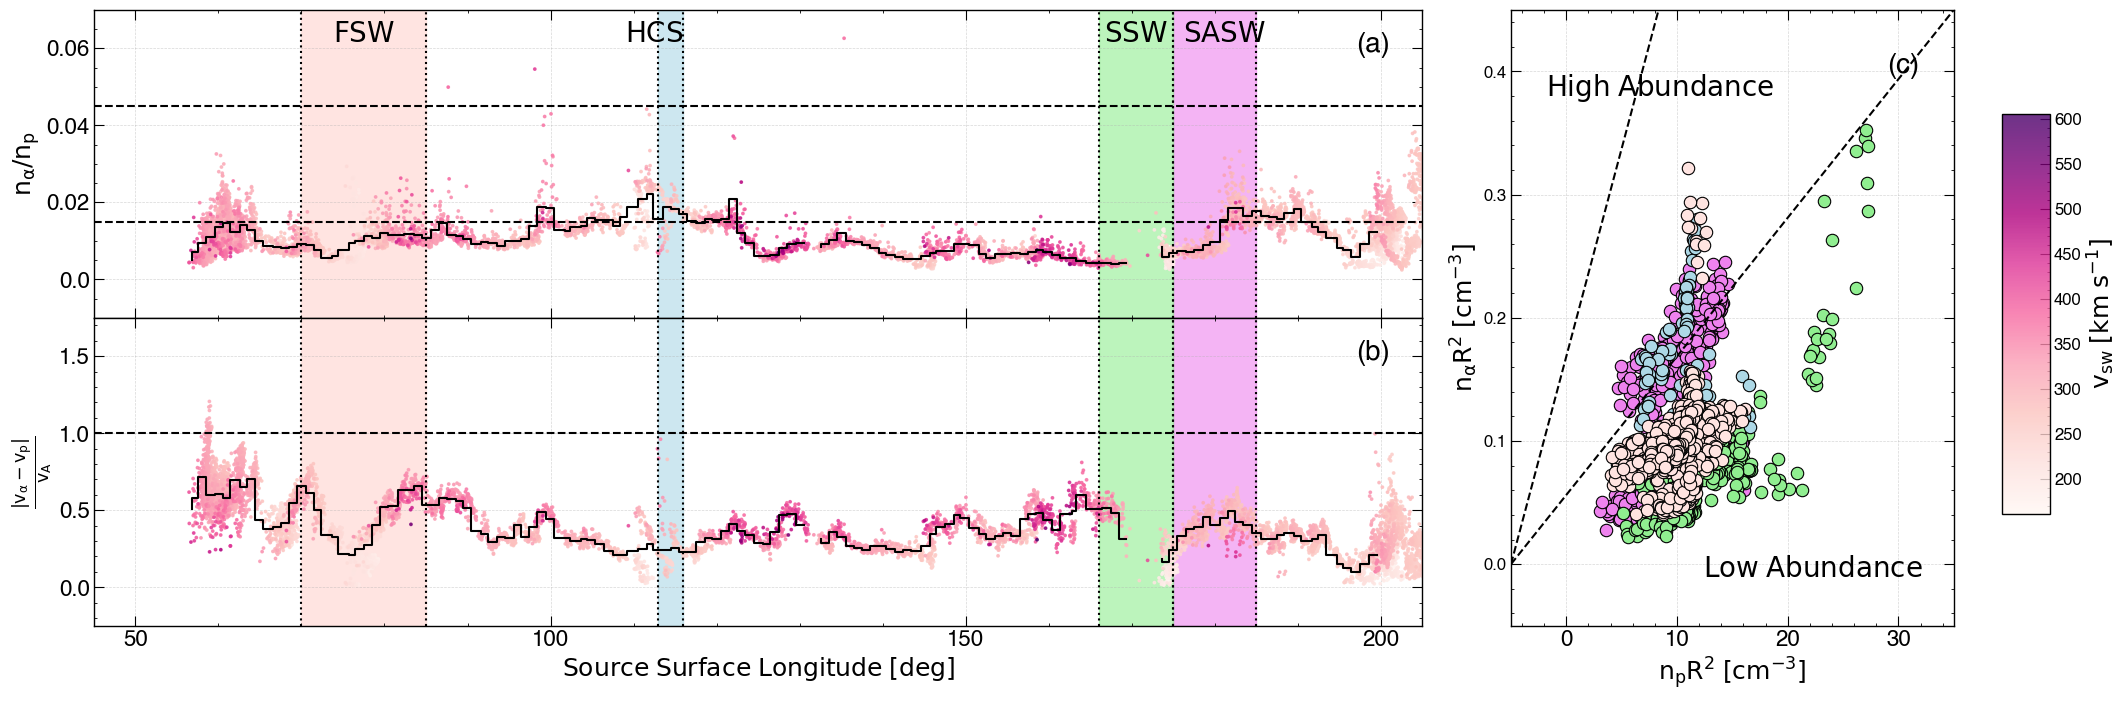

In [10]:
### SETUP FIGURE
fig = plt.figure(figsize=(24, 8))
ss=80
grid = plt.GridSpec(2, 2, width_ratios=[3, 1], height_ratios=[1, 1], wspace=0.1)

### LABELS
ylabel_list = [r'$\rm n_{\alpha} / n_p$', r'$\rm \frac{|v_{\alpha} - v_p|}{v_A}$']
panel_labels = ['(a)', '(b)', '(c)']

##### ---------- PANEL (A): ALPHA-TO-PROTON ABUNDANCE  ---------- ######
ax = plt.subplot(grid[0, 0])
cmap='RdPu'
hcs = 112
sc = ax.scatter(parker.lon, parker.Ahe, c=parker.pvel, cmap=cmap, s=3, alpha=0.8) 
ax.step(parkerdownl.lon, np.abs(parkerdownl.Ahe), c='k')
ax.set(ylim=(-0.05, 0.25), yticks=np.arange(0, 0.21, step=0.05))
ax.set_ylabel(ylabel_list[0], fontsize=18)
ax.set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
ax.set(ylim=(-0.01, 0.07), yticks=np.arange(0, 0.061, step=0.02))
ax.set_xticklabels(np.arange(50, 205, step=50), fontsize=16)
ax.set_yticklabels(np.arange(0, 0.061, step=0.02), fontsize=16)
ax.axhline(0.015, color='k', linestyle='dashed')
ax.axhline(0.045, color='k', linestyle='dashed')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

##### ---------- PANEL (B): ALPHA-TO-PROTON DIFFERENTIAL VELOCITY  ---------- ######
ax = plt.subplot(grid[1, 0])
ssc = ax.scatter(parker.lon, parker.vap/parker.vA, c=parker.pvel, cmap=cmap, s=3, alpha=0.8)
ax.step(parkerdownl.lon, parkerdownl.vap/parkerdownl.vA, c='k')
ax.set_ylabel(ylabel_list[1], fontsize=18)
ax.set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
ax.set(ylim=(-.25, 1.75), yticks=np.arange(0, 1.51, step=0.5))
ax.set_xticklabels(np.arange(50, 205, step=50), fontsize=16)
ax.set_yticklabels(np.arange(0, 1.51, step=0.5), fontsize=16)
ax.set_xlabel(r'$\rm Source \; Surface \; Longitude \; [deg]$', fontsize=18)
ax.axhline(1, color='k', linestyle='dashed')

### SHADE RELEVANT REGIONS
for i, ax in enumerate([plt.subplot(grid[0, 0]), plt.subplot(grid[1, 0])]):
    ax.tick_params(axis='both', which='major', labelsize=16) 
    # shade interesting regions
    ax.axvspan(fsw[0], fsw[1], alpha=1, color=fcol, zorder=-3)
    ax.axvspan(sasw[0], sasw[1], alpha=aa, color=sacol, zorder=-3)
    ax.axvspan(loc_hcs[0], loc_hcs[1], alpha=aa, color=hcol, zorder=-3)
    ax.axvspan(ssw[0], ssw[1], alpha=aa, color=scol, zorder=-3)
    ax.axvline(loc_hcs[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(loc_hcs[1], color='k', linestyle='dotted', zorder=5)
    ax.axvline(ssw[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(ssw[1], color='k', linestyle='dotted', zorder=5)
    ax.axvline(fsw[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(fsw[1], color='k', linestyle='dotted', zorder=5)
    ax.axvline(sasw[0], color='k', linestyle='dotted', zorder=5)
    ax.axvline(sasw[1], color='k', linestyle='dotted', zorder=5)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.text(0.95, 0.93, panel_labels[i], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')


##### ---------- PANEL (C): ALPHA-TO-PROTON DENSITY COMPARISON  ---------- ######
ax = plt.subplot(grid[:, 1])
d1 = parker.pdens
d2=parker.adens
ax.scatter(d1[salf], d2[salf], c=sacol, s=ss, linewidth=0.8, edgecolor='k')
ax.scatter(d1[fast], d2[fast], c=fcol, s=ss, linewidth=0.8, edgecolor='k', zorder=5)
ax.scatter(d1[slow], d2[slow], c=scol, s=ss, linewidth=0.8, edgecolor='k', zorder=3)
ax.scatter(d1[hhcs], d2[hhcs], c=hcol, s=ss, linewidth=0.8, edgecolor='k', zorder=4)

ax.set_xlabel(r'$\rm n_p R^2 \; [cm^{-3}]$', fontsize=18)
ax.set_ylabel(r'$\rm n_{\alpha} R^2 \; [cm^{-3}]$', fontsize=18)
ax.set(xlim=(-5, 35), xticks=np.arange(0, 31, step=10))
ax.set(ylim=(-0.05, 0.45), yticks=np.arange(0, 0.41, step=0.1))
ax.set_xticklabels(np.arange(0, 31, step=10), fontsize=16)
ax.plot(np.linspace(-5, 35), np.linspace(0, 30)*0.015, color='k', linestyle='dashed')
ax.plot(np.linspace(-5, 35), np.linspace(0, 30)*0.045, color='k', linestyle='dashed')
ax.text(0.08, 0.9, r'$\rm High \; Abundance$', transform=ax.transAxes, fontsize=20, va='top')
ax.text(0.93, 0.08, r'$\rm Low \; Abundance$', transform=ax.transAxes, fontsize=20, ha='right')
ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
ax.text(0.85, 0.93, panel_labels[2], transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

# fig.subplots_adjust(right=0.8)
cax = fig.add_axes([0.92, 0.25, 0.02, 0.5]) 
cbar = fig.colorbar(ssc, cax=cax)
cbar.set_label(r'$\rm v_{sw} \; [km \; s^{-1}]$', fontsize=18)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0) 

ax = plt.subplot(grid[0, 0])
ax.text(0.40, 0.96, r'$\rm HCS$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.18, 0.96, r'$\rm FSW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.76, 0.96, r'$\rm SSW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')
ax.text(0.82, 0.96, r'$\rm SASW$', transform=ax.transAxes, fontsize=20, fontweight='bold', va='top', ha='left')

### SAVE FIGURE
fig.savefig('figures/fig5.png', bbox_inches='tight') #PNG
fig.savefig('eps_figures/fig5.eps', bbox_inches='tight') #EPS
